# Analyze Salary with Linear Regression
Python Automation; Scott Schmidt; Illinois State University

## Introduction
1. The dataset will have two columns of data which are years and salary. 
2. Split the data using 75% training and 25% testing. 
3. Calculate Covariance and Variance to find the coefficients. 
4. Evaluate the model performance using Root Mean Square Error (RMSE).

This assignment is valuable coming from someone who passed a first round Python Data Science interview at a fortune100. This verifies that one understands all the imports by doing them manually by hand. Often times, imports can weaken ones understanding because the human will not understand the entire process.

## Math Functions
called sumList(), meanList(), minMaxList(), and stdevList() to calculate the summation, mean, minimum, maximum, standard deviation of any given list. Each function has a list as an input, and returns the corresponding result (i.e., sum, mean, min, max, stdev, etc.). Please note: a) meanList() should use sumList() to calculate the summation of a list; b) stdevList() should use meanList() to calculate the mean value; c) minMaxList() should return both min and max values.

In [2]:
#Return the total:
def sumList(numbers):
    count=0
    for n in numbers:
        count=count+float(n)
    total=round(count,2)
    return total

#Return the mean:
def meanList(numbers):
    total=sumList(numbers)
    mean=round(total/len(numbers),2)
    return mean

#Return the standard deviation:
def stdevList(mean):
    var=0 #variance
    for d in data:
        n=d-mean
        n2=n*n
        var=var+n2
    std=var/len(data)
    std=round(std**0.5,2)
    return std

## Step One: View Data
Read the csv file and display the data below.

In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.metrics import mean_absolute_error, mean_squared_error

sFile=r'/kaggle/input/salary/salary.csv'
sDF = pd.read_csv(sFile, header=None, names=['years', 'salary'])
sDF

## Step Two: Split Data
Function will be called train_test_split that will split the dataset List into a training set and a test based on 75% for training and 25% for testing. Normally, one can use `from sklearn.model_selection import train_test_split` to do this but in this case the train_test_split function will do this manually.

In [4]:
def train_test_split(aList, ratio=.25):
    elements = len(aList)
    middle = int(elements * ratio)
    trainSet=[list_to_split[:middle]]
    testSet=[list_to_split[middle:]]
    return trainSet, testSet

## Step Three: Calculate Variance
Calculate covariance and variance from the training dataset. 
<br> Another function, coefficeints will find out the cofficients.
Some premade math functions I made that will used are the following:<br>
`
mean=meanList(data)
stdev=stdevList(mean)
`


In [5]:
# Calculate the variance of a list of numbers:
def varianceList(aList):
    # calculate mean
    m = meanList(aList)

    # calculate variance using a list comprehension
    var = sum((xi - m) ** 2 for xi in aList) / len(aList)
    return var

#Calculate the covariance of two lists of numbers:
def covarianceList(x, y):
    # Finding the mean of the series x and y
    mean_x = meanList(x)
    mean_y = meanList(y)
    
    # Subtracting mean from the individual elements
    sub_x = [i - mean_x for i in x]
    sub_y = [i - mean_y for i in y]
    
    numerator = sum([sub_x[i]*sub_y[i] for i in range(len(sub_x))])
    denominator = len(x)-1
    cov = numerator/denominator
    return cov

#### Calculate Coefficients
Calculate the {w}_{0} and {w}_{1} values <br>
Hint: Calculate the covariance of two lists of numbers: <br>
The input is a list with each item a list   [x, y] <br>

In [6]:
def coefficeints(trainingDatasetList):
    x=list(trainingDatasetList[0])
    y=list(trainingDatasetList[1])

    w1 = covarianceList(x, y) / float(varianceList(x))
 
    # Coefficient W0 = mean of y_readings - ( W1 * the mean of the x_readings )
    w0 = meanList(y) - (w1 * meanList(x))
    return w0, w1

##### Print Function Results:

In [7]:
sDF=sDF.reset_index()
x=sDF['years']
y=sDF['salary']
x=list(x)
y=list(y)

#COVARIANCE:
cov=round(covarianceList(x,y),2)
print("The covariance is: ", cov)

#VARIANCE:
var=round(varianceList(x),2)
print("The variance is: ", var)

#COEFFICIENTS:
trainingDatasetList= [x, y]
coef=coefficeints(trainingDatasetList)
print("The coefficients are: ", coef)

w0=coef[0]
w1=coef[1]
print(w0)

## y = w0 + w1*x1
`
x_new = np.array([0, 1, 2, 3])
y_prediction = lr.intercept_ + x_new*lr.coef_[0]
lr.predict(x_new.reshape(-1,1))
`

w0 and w1 are the two coefficients, where w0 is the intercept (of the y-axis), and w1 is the slope of the line. w1 shows the impact of the independent variable x1 on y. For example, when w1 = 0, there’s no impact of x1 on y since (0*x1 = 0).

In simple terms, linear regression is an algorithm that finds the best values of w0 and w1 to fit the training dataset.

## Step4) Calculate RMSE
Root Mean Squared Error (RMSE) is the standard deviation of the prediction errors. In simple terms, it tells an individual how far the predictions are away from the line of best fit. Here is the official formula below: <br>
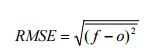

Σ = summation (“add up”) <br>
(zfi – Zoi)2 = differences, squared <br>
N = sample size.

Specifically, one must do the following to get the RMSE:
1. Squaring the residuals.
2. Finding the average of the residuals.
3. Taking the square root of the result.

In [8]:
def evalRMSE(testResultsList):
    rmse= np.sqrt(((predictions - targets) ** 2).mean())
    return rmse

## References
1. https://www.urbanpro.com/machine-learning/linear-regression-without-any-libraries
2. https://dataaspirant.com/simple-linear-regression-python-without-any-machine-learning-libraries/
3. https://github.com/Rajath1995/Linear-Regression-without-Scikit-Learn/blob/master/P1%20Regression%20-%20Group%201.ipynb

## Simple Linear Regression with imports
This is the same concept but doing the linear regression with sklearn as an import. One of the most basic and used types of predictive modeling is linear regression. Linear regression can help find the strength and effect indepedent variables have on dependent variables. I will verify the results using sklearn imports, instead of doing it by hand.

In [9]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
from sklearn.metrics import r2_score

x=sDF[['years']]
x=sDF[['salary']]
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=13)

#Fit and predict:
lrModel = LinearRegression()
lrModel.fit(X_train, y_train)
lrPredict = lrModel.predict(X_test)

#Linear Metrics:
r2 = r2_score(y_test, lrPredict).round(4) 
print("Linear regression r2 score: ", r2)

#PRINT COEFFICIENT:
lrCoef=lrModel.coef_  
print("Linear coef: ", lrCoef)

#PRINT MEAN SQUARED ERROR:
lrMSE=np.sqrt(metrics.mean_squared_error(y_test, lrPredict))
print("Linear regression MSE: ", lrMSE)

## Plot Data
The graph clearly shows a trend that salary and years are correlated. Meaning, the more years experience, the salary tends to be higher. 

In [10]:
import matplotlib.pyplot as plt
x=sDF['years']
y=sDF['salary']
plt.scatter(x,y)
plt.title("Years versus Salary")
plt.xlabel('Years')
plt.ylabel('Salary')
plt.show()